In [ ]:
#######📌 **If you're using Google Colab**, you can uncomment the following lines to mount Google Drive:
# from google.colab import drive
# drive.mount('/content/drive')
# df = pd.read_csv('/content/drive/MyDrive/path_to_your_file.csv')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.metrics import cohen_kappa_score

# Loading CSV file

df = pd.read_csv('path/to/your_file.csv')

annotator1_labels = df['Annotator_1'].astype(str)
annotator2_labels = df['Annotator_2'].astype(str)

# Calculating Cohen's Kappa
kappa_score = cohen_kappa_score(annotator1_labels, annotator2_labels)

# Output
print(f"Cohen's Kappa Score: {kappa_score}")


Cohen's Kappa Score: 0.6499311883164973


In [ ]:
import pandas as pd

df = pd.read_csv('path/to/your_file.csv')

column_data = df['English MT']

column_data = column_data.astype(str)

data_lengths = column_data.apply(len)

max_length = data_lengths.max()
average_length = data_lengths.mean()

print(f"Maximum length of data: {max_length}")
print(f"Average length of data: {average_length:.2f}")


Maximum length of data: 7805
Average length of data: 373.06


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer


nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import seaborn as sns
# Input path to the CSV file
file_path = input("Enter the path to the CSV fil\e: ")

# Read the CSV file
#dataset= pd.read_csv("/content/drive/MyDrive/FIGNEWS-2024-BRACU_BHULEGESI - Sheet14.csv",header = 0, encoding = 'Latin', engine = 'python')
df = pd.read_csv(file_path, header=0, encoding='Latin', engine='python')

Enter the path to the CSV fil\e: /content/FIGNEWS-2024-BRACU_BHULEGESI - Main.csv


In [ ]:
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Lowercase
    text = text.lower()

    # Remove non-ASCII characters
    text = re.sub(r'[^\x00-\x7F]+', ' ', text)

    # Remove punctuation except hashtags
    text = re.sub(r'[^\w\s#]', '', text)

    # Replace hashtags with the text after the symbol
    text = re.sub(r'#(\w+)', r'\1', text)

    # Tokenize the text
    words = text.split()

    # Remove stopwords
    words = [word for word in words if word not in stop_words]

    # Lemmatize the words
    words = [lemmatizer.lemmatize(word) for word in words]

    # Join the words back into a single string
    processed_text = ' '.join(words)

    return processed_text

# Apply preprocessing to- 'article' column
df['processed_article'] = df['English MT'].apply(preprocess_text)

# Displaing the first few rows of the data with the new column
df[['English MT', 'processed_article']].head()

,English MT,processed_article
0,Yemen's Houthis have waded into the Israel-Ham...,yemen houthis waded israelhamas war raging 100...
1,Isreal - Hamas Conflict | Face to Face,isreal hamas conflict face face
2,Videos show how armed men from Gaza stormed a ...,video show armed men gaza stormed music festiv...
3,Protest in Aligarh Muslim University in suppor...,protest aligarh muslim university support hama...
4,IDF releases audio recording about misfired ro...,idf release audio recording misfired rocket ca...


In [ ]:

df['Text Length'] = df['English MT'].apply(len)

#max text length:
max_text_length = df['Text Length'].max()
print("Maximum text length:", max_text_length)


Maximum text length: 7805


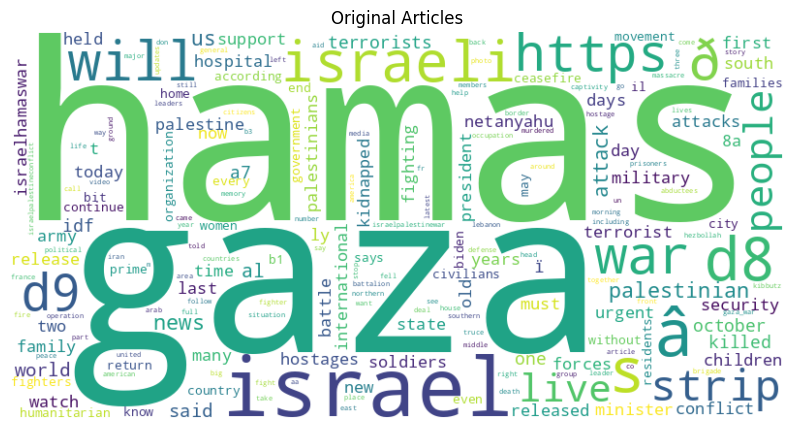

In [ ]:
from collections import Counter
import re

all_words = ' '.join(df['English MT']).lower()
all_words = re.findall(r'\b\w+\b', all_words)
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
wordcloud = WordCloud(width=800, height=400, background_color='white',
                          collocations=False, normalize_plurals=False).generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Original Articles')
plt.show()

In [ ]:
df['English MT'] = df['processed_article']

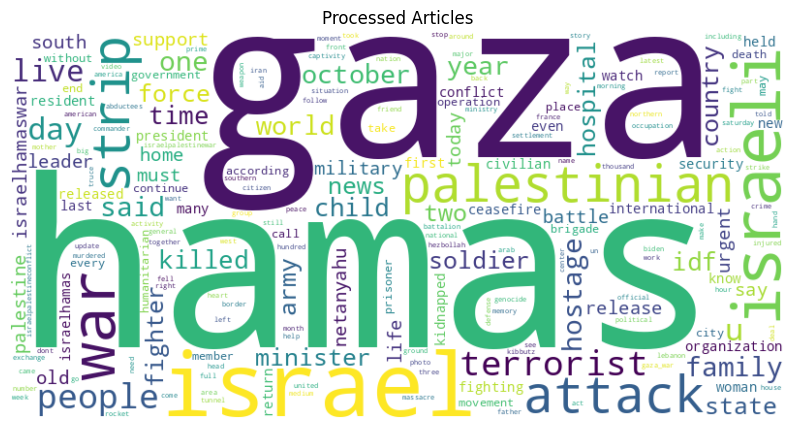

In [ ]:
from collections import Counter
import re

all_words = ' '.join(df['English MT']).lower()
all_words = re.findall(r'\b\w+\b', all_words)
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)
wordcloud = WordCloud(width=800, height=400, background_color='white',
                          collocations=False, normalize_plurals=False).generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Processed Articles')
plt.show()

(15000, 15)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Batch              15000 non-null  object 
 1   Source Language    15000 non-null  object 
 2   ID                 15000 non-null  int64  
 3   Type               15000 non-null  object 
 4   Text               15000 non-null  object 
 5   English MT         15000 non-null  object 
 6   Arabic MT          15000 non-null  object 
 7   Annotator ID       0 non-null      float64
 8   bias               15000 non-null  object 
 9   Propaganda         0 non-null      float64
 10  Comments           0 non-null      float64
 11  processed_article  15000 non-null  object 
 12  Text Length        15000 non-null  int64  
 13  English MT Length  15000 non-null  int64  
 14  Arabic MT Length   15000 non-null  int64  
dtypes: float64(3), int64(4), object(8)
memory usage: 1.7+ MB
N

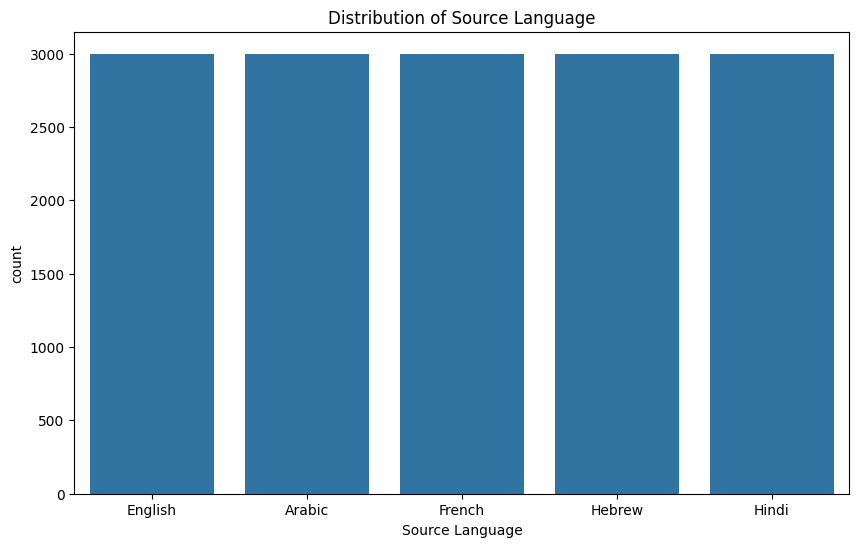

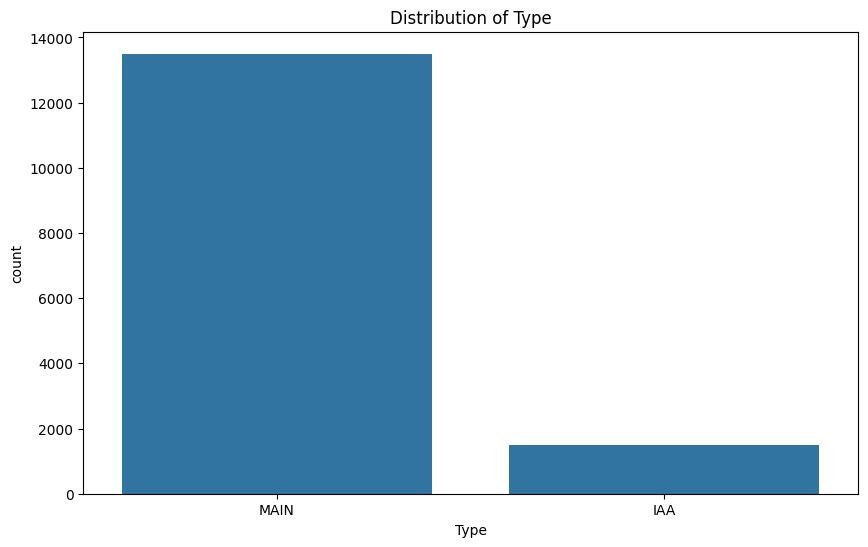

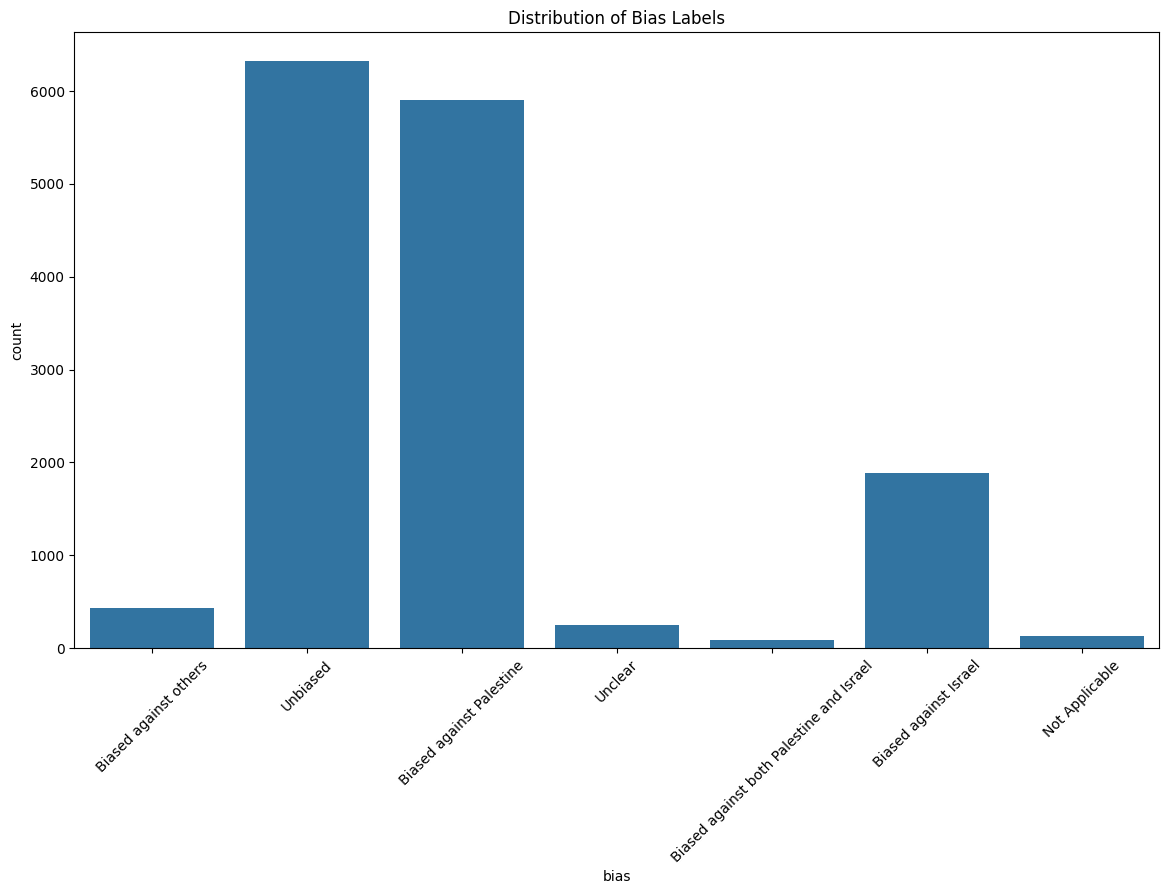

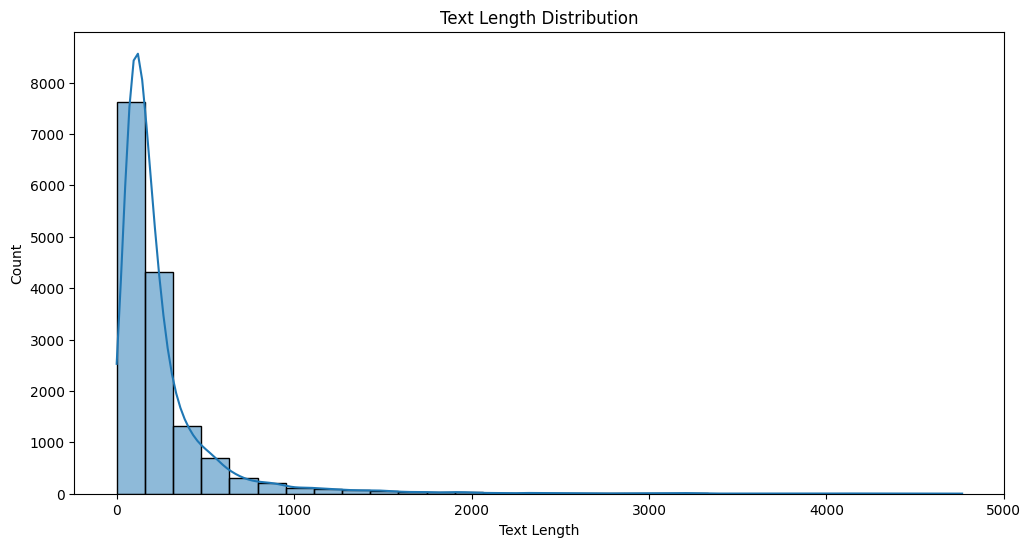

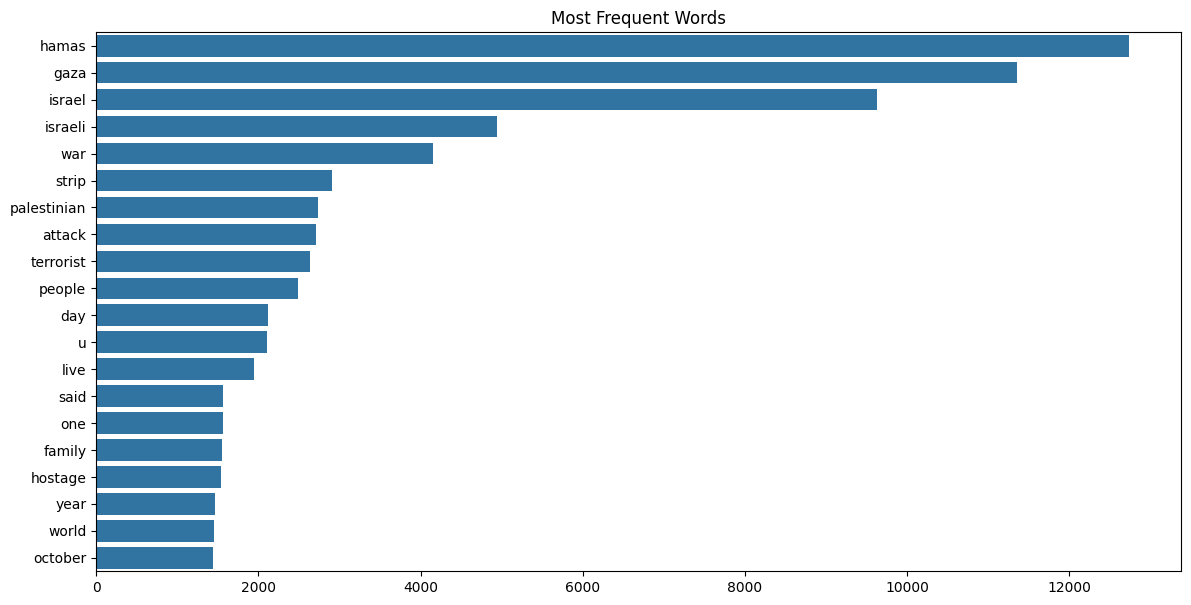

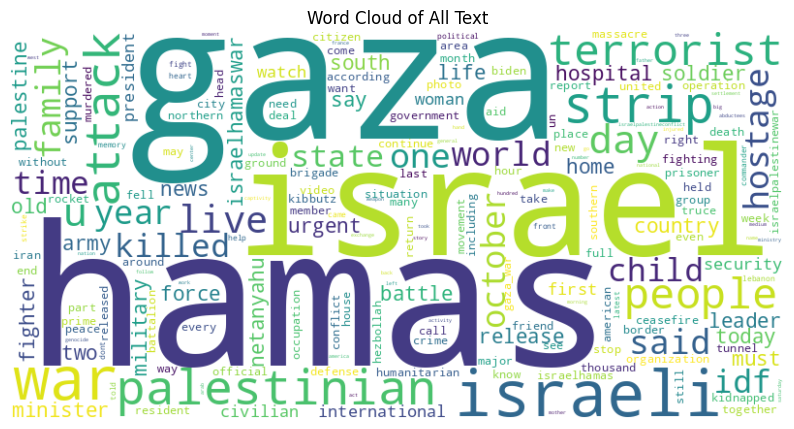

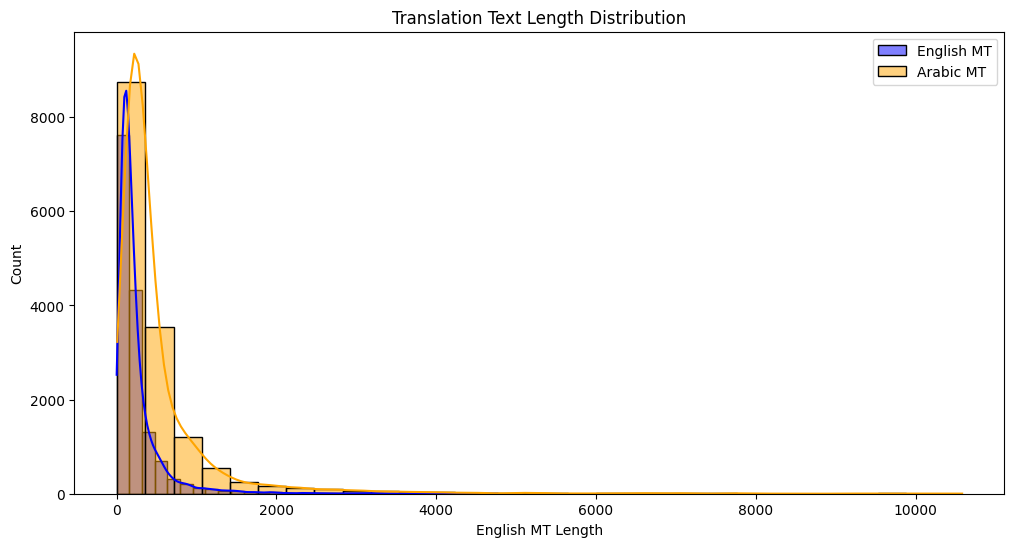

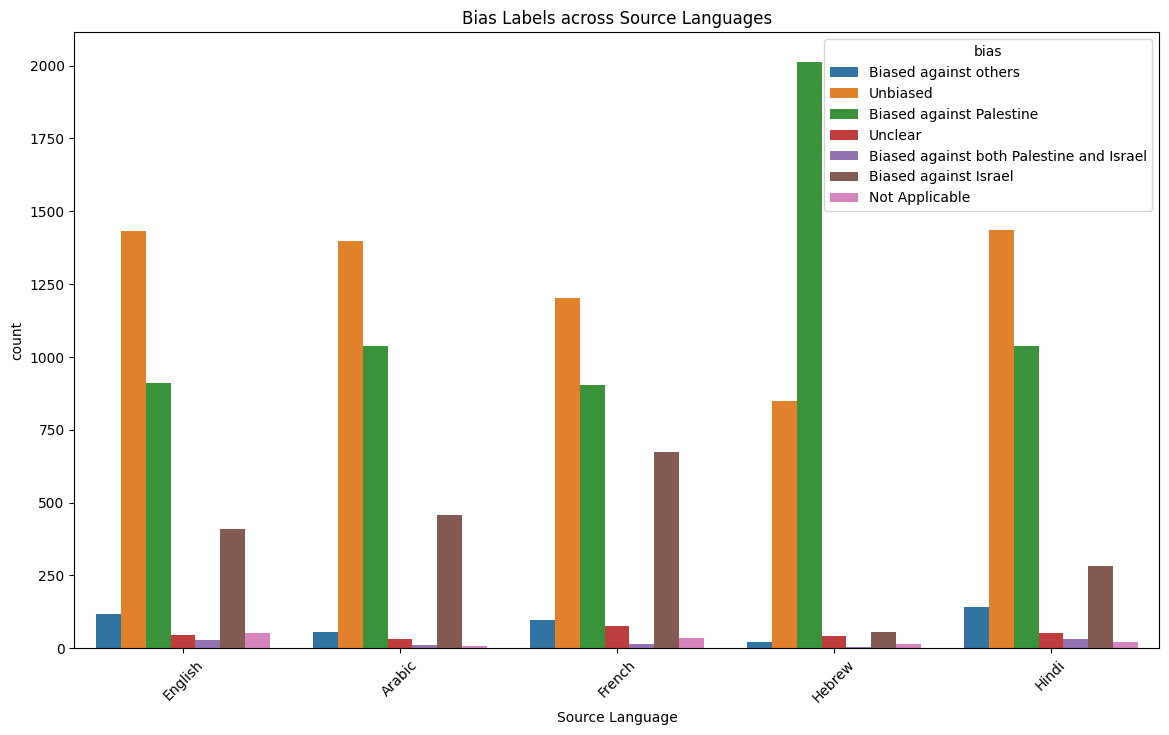

In [ ]:


# 1. General Dataset Overview
print(df.shape)
print(df.info())
print(df.describe(include='all'))

# 2. Distribution Analysis
# Distribution of Source Language
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Source Language')
plt.title('Distribution of Source Language')
plt.show()

# Distribution of Type
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Type')
plt.title('Distribution of Type')
plt.show()

# Distribution of Bias Labels
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='bias')
plt.title('Distribution of Bias Labels')
plt.xticks(rotation=45)
plt.show()

# 3. Text Analysis
# Text length distribution
df['Text Length'] = df['English MT'].apply(len)
plt.figure(figsize=(12, 6))
sns.histplot(df['Text Length'], bins=30, kde=True)
plt.title('Text Length Distribution')
plt.show()

# Most frequent words
from collections import Counter
import re

all_words = ' '.join(df['English MT']).lower()
all_words = re.findall(r'\b\w+\b', all_words)
word_freq = Counter(all_words)
common_words = word_freq.most_common(20)

# Bar plot of the most common words
words, counts = zip(*common_words)
plt.figure(figsize=(14, 7))
sns.barplot(x=list(counts), y=list(words))
plt.title('Most Frequent Words')
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white',
                          collocations=False, normalize_plurals=False).generate(' '.join(all_words))
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of All Text')
plt.show()


# 4. Translation Analysis
# Comparing text lengths of original and translated texts
df['English MT Length'] = df['English MT'].apply(len)
df['Arabic MT Length'] = df['Arabic MT'].apply(len)

plt.figure(figsize=(12, 6))
sns.histplot(df['English MT Length'], bins=30, kde=True, color='blue', label='English MT')
sns.histplot(df['Arabic MT Length'], bins=30, kde=True, color='orange', label='Arabic MT')
plt.title('Translation Text Length Distribution')
plt.legend()
plt.show()


# 5. Bias Analysis
# Frequency of each bias label across different source languages and types
colors = sns.color_palette("Blues", as_cmap=True)

# Plotting the countplot
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Source Language', hue='bias')
plt.title('Bias Labels across Source Languages')
plt.xticks(rotation=45)
plt.show()




In [ ]:
max_text_length = df['Text Length'].max()
print("Maximum text length:", max_text_length)

Maximum text length: 4765


(15000, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   article  15000 non-null  object
 1   bias     15000 non-null  object
dtypes: object(2)
memory usage: 234.5+ KB
None
            article      bias
count         15000     15000
unique        14456         7
top     BREAKING...  Unbiased
freq             18      6316


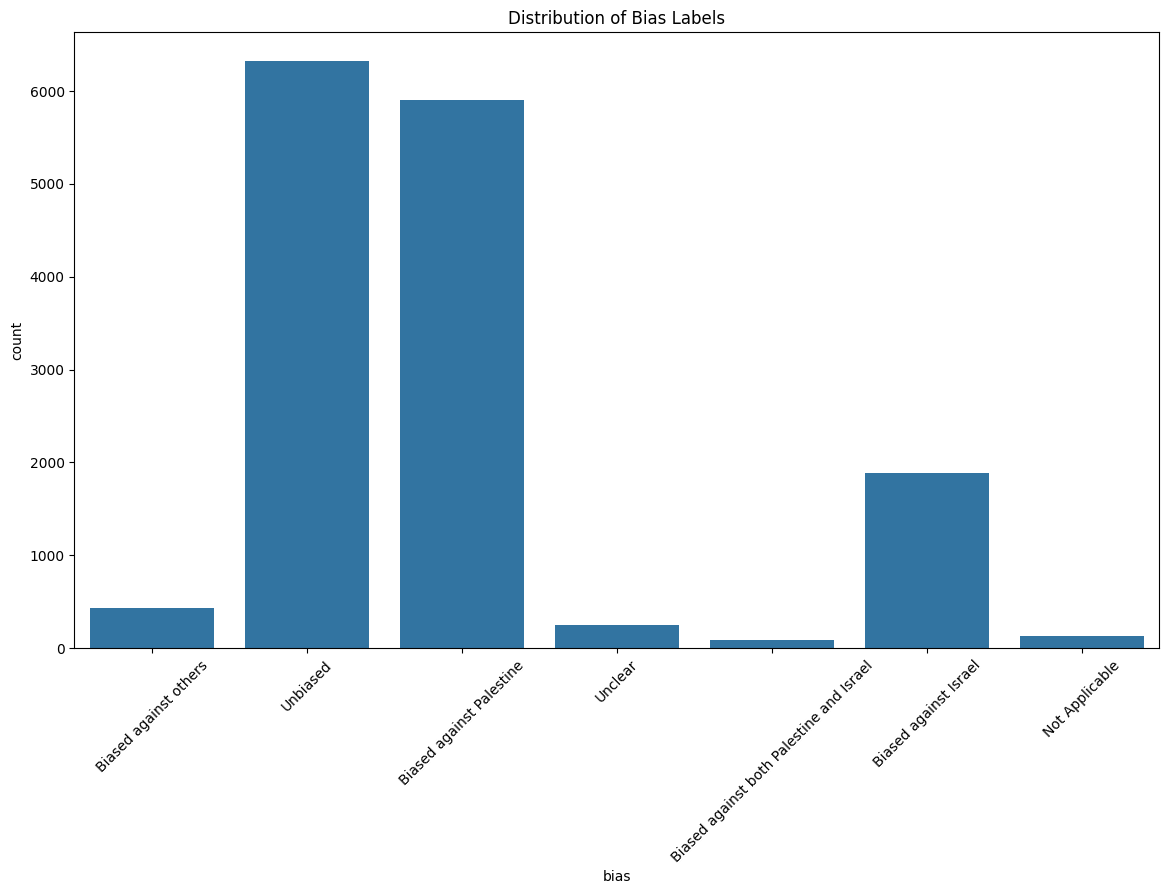

bias
Unbiased                                    6316
Biased against Palestine                    5906
Biased against Israel                       1882
Biased against others                        431
Unclear                                      249
Not Applicable                               126
Biased against both Palestine and Israel      90
Name: count, dtype: int64


In [ ]:
# 1. General Dataset Overview
print(df.shape)
print(df.info())
print(df.describe(include='all'))


# Distribution of Bias Labels
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='bias')
plt.title('Distribution of Bias Labels')
plt.xticks(rotation=45)
plt.show()


# Counting number of articles for each bias label
label_counts = df['bias'].value_counts()


print(label_counts)



In [ ]:
# bias labels that will be limited to 1000 rows
labels_to_limit = ['Unbiased', 'Biased against Palestine', 'Biased against Israel']

# Selecting the top 1000 rows for thsoe labels
df_limited = df[df['bias'].isin(labels_to_limit)].groupby('bias').head(1000)

# Select all rows for the other labels
df_rest = df[~df['bias'].isin(labels_to_limit)]

# Combine both DF
df_filtered = pd.concat([df_limited, df_rest])

df_filtered = df_filtered.reset_index(drop=True)

# Displaying the new filtered DF
print(df_filtered['bias'].value_counts())


bias
Unbiased                                    1000
Biased against Palestine                    1000
Biased against Israel                       1000
Biased against others                        431
Unclear                                      249
Not Applicable                               126
Biased against both Palestine and Israel      90
Name: count, dtype: int64


In [ ]:
# Calculate the word count for each text in the 'English MT' column
df['Word Count'] = df['Text'].apply(lambda x: len(x.split()))

# Calculate the average word count
average_word_count = df['Word Count'].mean()
print(f'The average word count is: {average_word_count}')


KeyError: 'Text'

bias
Unbiased                    6316
Biased against Palestine    5906
Biased against Israel       1882
Biased against others        431
Unclear                      249
Not Applicable               126
Biased against both           90
Name: count, dtype: int64


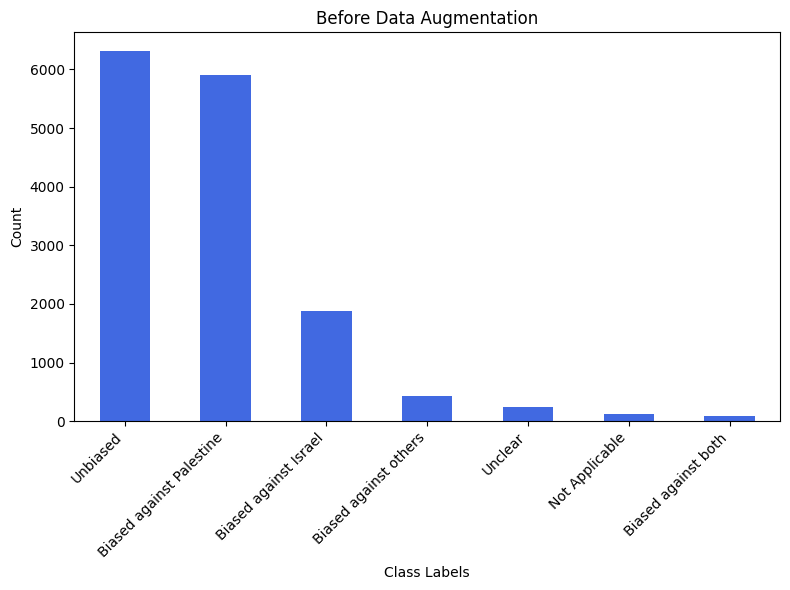

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/drive/MyDrive/AThesis/FIGNEWS-2024-BRACU_BHULEGESI - MAIN-IAA-Full.csv'
data = pd.read_csv(file_path)
data['bias'] = data['bias'].replace('Biased against both Palestine and Israel', 'Biased against both')
# Count the occurrences of each label in the 'bias' column
label_counts = data['bias'].value_counts()

# Print the number of labels for each class
print(label_counts)

# Plot the label counts as a bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='royalblue')
plt.title('Before Data Augmentation')
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


bias
Unbiased                    4991
Biased against Palestine    4732
Biased against Israel       1514
Biased against others        350
Unclear                      203
Not Applicable               124
Biased against both           86
Name: count, dtype: int64


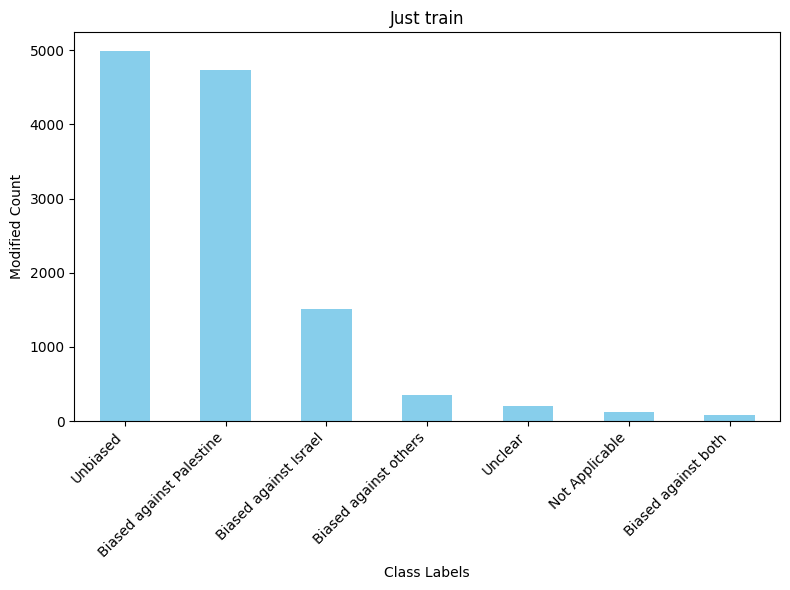

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/FIGNEWS-2024-BRACU_BHULEGESI - just train.csv'
data = pd.read_csv(file_path)
data['bias'] = data['bias'].replace('Biased against both Palestine and Israel', 'Biased against both')
# Count the occurrences of each label in the 'bias' column
label_counts = data['bias'].value_counts()

# Modify the counts for 'Unclear' and 'Biased against others' by multiplying by 5
# Print the number of labels for each class
print(label_counts)
# Plot the modified label counts as a bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Just train')
plt.xlabel('Class Labels')
plt.ylabel('Modified Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


bias
Unbiased                    1231
Biased against Palestine    1169
Biased against Israel        364
Biased against others         94
Unclear                       49
Not Applicable                29
Biased against both           26
Name: count, dtype: int64


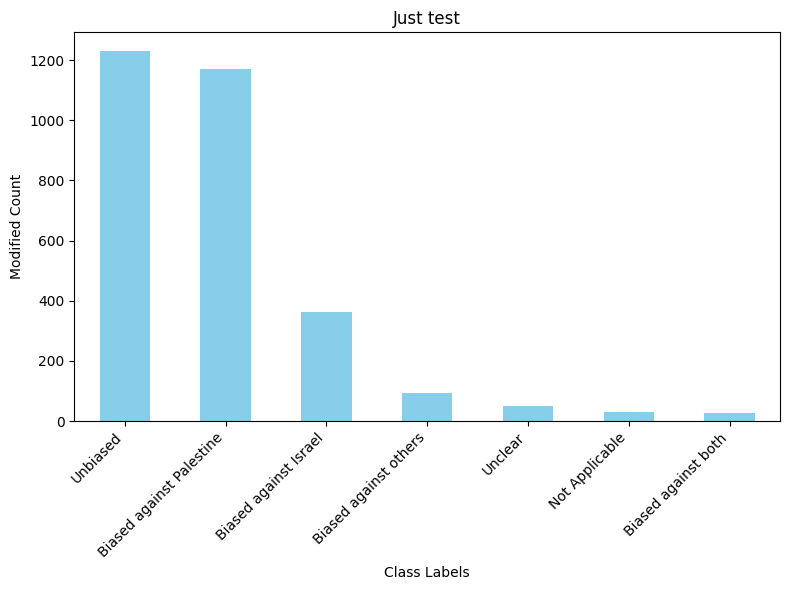

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/FIGNEWS-2024-BRACU_BHULEGESI - test_dataset_fornow (2).csv'
data = pd.read_csv(file_path)
data['bias'] = data['bias'].replace('Biased against both Palestine and Israel', 'Biased against both')
# Count the occurrences of each label in the 'bias' column
label_counts = data['bias'].value_counts()

# Modify the counts for 'Unclear' and 'Biased against others' by multiplying by 5
# Print the number of labels for each class
print(label_counts)
# Plot the modified label counts as a bar chart
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')
plt.title('Just test')
plt.xlabel('Class Labels')
plt.ylabel('Modified Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [ ]:
# Print unique values in the 'bias' column to find the exact string for replacement
file_path = '/content/FIGNEWS-2024-BRACU_BHULEGESI - test_dataset_fornow (2).csv'
data = pd.read_csv(file_path)
data.head()
#unique_labels = data['bias'].unique()
#print(unique_labels)


,article,bias
0,Hello Gaza ð Tzachi Debosh,Unclear
1,Losing support.,Unclear
2,LIVE | Who is Laden with wheel chair? How will...,Unclear
3,POLL | Do you take pride in South Africa's eff...,Unclear
4,"LIVE | Hamas, Hezbollah, Houthi... Israel's si...",Unclear


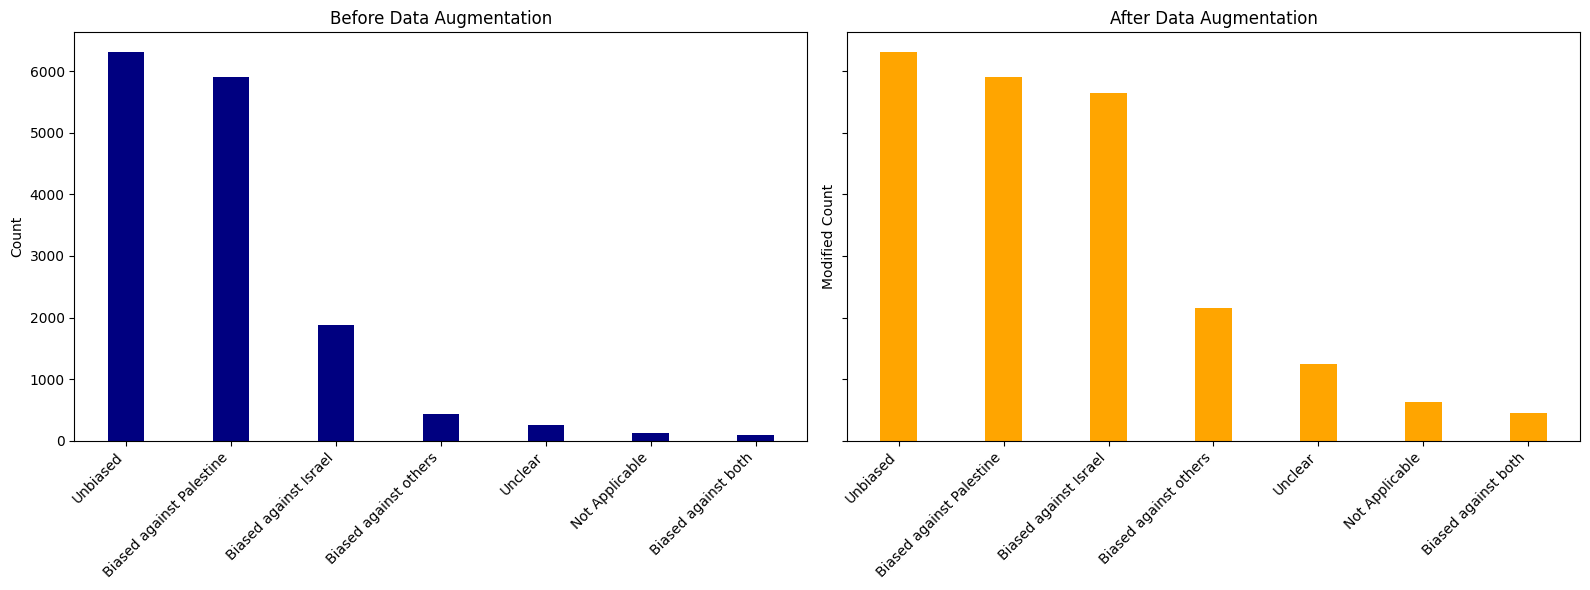

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Creating data for the chart
labels = ['Unbiased', 'Biased against Palestine', 'Biased against Israel', 'Biased against others',
          'Unclear', 'Not Applicable', 'Biased against both']
before_counts = [6316, 5906, 1882, 431, 249, 126, 90]
after_counts = [6316, 5906, 1882*3, 431*5, 249*5, 126*5, 90*5]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

# Plotting the bar chart with deep blue and orange colors
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

# Before augmentation (deep blue)
ax1.bar(x, before_counts, width, color='navy')
ax1.set_ylabel('Count')
ax1.set_title('Before Data Augmentation')
ax1.set_xticks(x)
ax1.set_xticklabels(labels, rotation=45, ha='right')

# After augmentation (orange)
ax2.bar(x, after_counts, width, color='orange')
ax2.set_ylabel('Modified Count')
ax2.set_title('After Data Augmentation')
ax2.set_xticks(x)
ax2.set_xticklabels(labels, rotation=45, ha='right')

# Show the plot
plt.tight_layout()
plt.show()
